## PRÁCTICA No 4 segunda entrega

### Introducción al análisis frecuencial de señales

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio;

 4.1) Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 60, 120 y 360 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla.

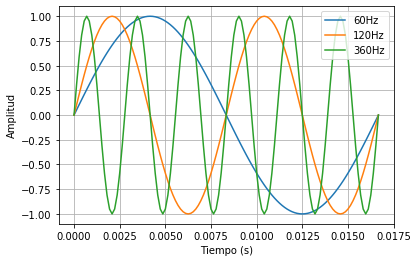

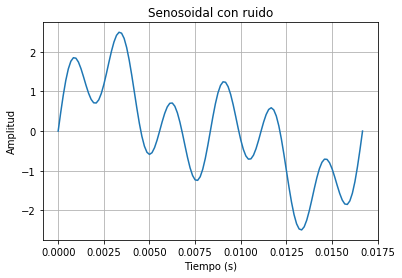

In [7]:
f1 = 60     # Frecuencias Fundamentales
f2 = 120
f3 = 360
fs = 7200   # Frecuencia de muestreo 10*2Fs

T1 = 1/f1
T2 = 1/f2
T3 = 1/f3
Ts = 1/fs   # Período de muestreo

t1 = np.arange(0, T1+Ts, Ts)    # Vectores de tiempo de cada señal   
t2 = np.arange(0, T2+Ts, Ts)
t3 = np.arange(0, T3+Ts, Ts)
ts = np.arange(0, T1 + Ts, Ts)       # Vector de tiempo común

senal_1 = np.sin(2*np.pi*f1*ts)     # Componentes de la señal
senal_2 = np.sin(2*np.pi*f2*ts)
senal_3 = np.sin(2*np.pi*f3*ts)

senal_compuesta = senal_1 + senal_2 + senal_3   # Señal compuesta

fig1 = plt.figure();    # Gráfica
plt.plot(ts,senal_1)
plt.plot(ts,senal_2)
plt.plot(ts,senal_3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(['60Hz','120Hz','360Hz'])
plt.grid();

fig2 = plt.figure();    # Gráfica
plt.plot(ts,senal_compuesta)
plt.title('Senosoidal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

4.2) Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 ciclos de la señal).

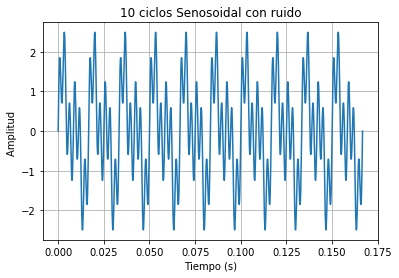

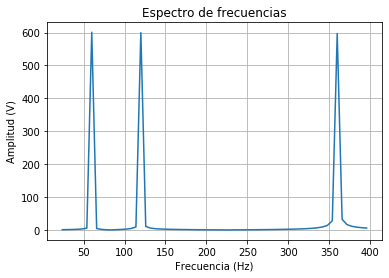

In [8]:
# Construccion de 10 ciclos de la señal compuesta
ts_10 = np.arange(0, 10*T1 + Ts, Ts)

senal_1 = np.sin(2*np.pi*f1*ts_10)     
senal_2 = np.sin(2*np.pi*f2*ts_10)
senal_3 = np.sin(2*np.pi*f3*ts_10)

señal_10_ciclos = senal_1 + senal_2 + senal_3

fig3 = plt.figure();    # Gráfica
plt.plot(ts_10,señal_10_ciclos)
plt.title('10 ciclos Senosoidal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud ')
plt.grid();

# Transformada de Fourier de dicha señal
SENAL_10_CICLOS = np.abs(np.fft.fft(señal_10_ciclos))

N = SENAL_10_CICLOS.shape[0]
F = np.arange(0,N)*fs/N

fig4 = plt.figure();    # Gráfica
plt.plot(F[(F > 20) & (F < 400)],SENAL_10_CICLOS[(F > 20) & (F < 400)])
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (V)')
plt.grid();

4.3) Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier Aplíquelo a la señal anterior.

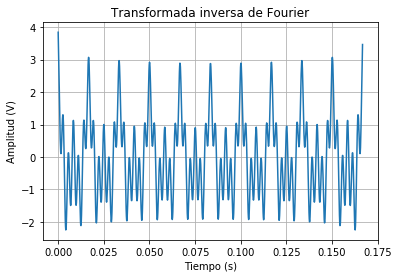

In [9]:
senal_reconstruida = np.fft.ifft(SENAL_10_CICLOS)
fig5 = plt.figure();    # Gráfica
plt.plot(ts_10,senal_reconstruida.real)
plt.title('Transformada inversa de Fourier')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid();

4.4) ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? 
Extraiga de manera similar cada una de las componentes de la señal.


F1:
[-3.01980663e-13+0.j          4.38041636e-04-0.16745863j
  1.78920534e-03-0.34199469j ...  4.17574988e-03+0.53210513j
  1.78920534e-03+0.34199469j  4.38041636e-04+0.16745863j]

F2:
[0. 0. 0. ... 0. 0. 0.]

F2 luego de asignar F1[9:13]:
[0. 0. 0. ... 0. 0. 0.]


/Users/santiagocardona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


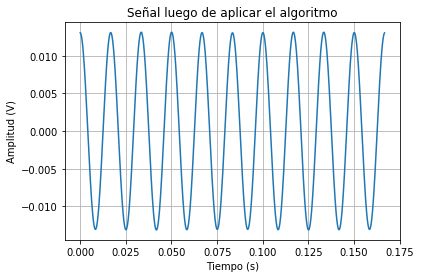

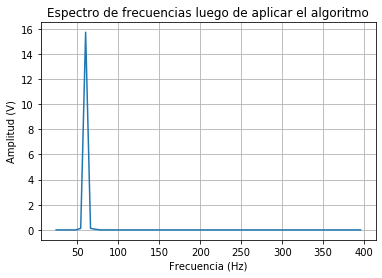

In [10]:
F1 = np.fft.fft(señal_10_ciclos);
print('\nF1:')
print(F1)
F2 = np.zeros((len(F1)));
print('\nF2:')
print(F2)

F2[9:13] = F1[9:13]
print('\nF2 luego de asignar F1[9:13]:')
print(F2)

xr = np.fft.ifft(F2)

fig6 = plt.figure();    # Gráfica
plt.plot(ts_10,np.real(xr))
plt.title('Señal luego de aplicar el algoritmo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid();

# Transformada de Fourier de dicha señal
SENAL_FILTRADA = np.abs(np.fft.fft(xr))

N = SENAL_FILTRADA.shape[0]
F = np.arange(0,N)*fs/N

fig7 = plt.figure();    # Gráfica
plt.plot(F[(F > 20) & (F < 400)],SENAL_FILTRADA[(F > 20) & (F < 400)])
plt.title('Espectro de frecuencias luego de aplicar el algoritmo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (V)')
plt.grid();

#### Análisis:
Efectivamente, el algoritmo aplicado puede ser considerado un filtro, ya que 
eliminó 2 de las 3 componentes frecuenciales, dejando la menor de ellas. Lo anterior podría 
simular el comportamineto de un filtro pasabajas. 

4.5)  El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis de la señal y determine si es necesario eliminar ruido, en tal caso, elimínelo y compruebe que lo haya realizado (calcule la transformada inversa de Fourier de la señal filtrada).

Las claves cargadas fueron: dict_keys(['__header__', '__version__', '__globals__', 'ECG'])


/Users/santiagocardona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


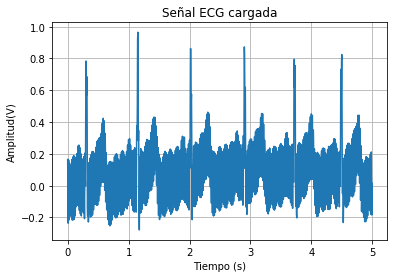

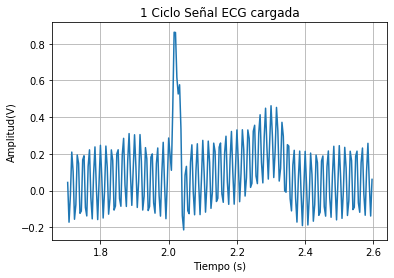

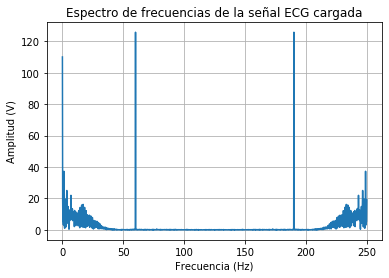

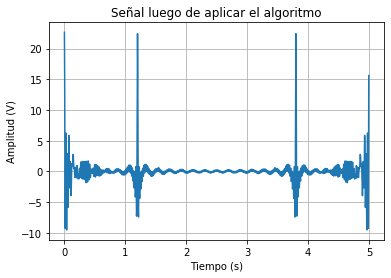

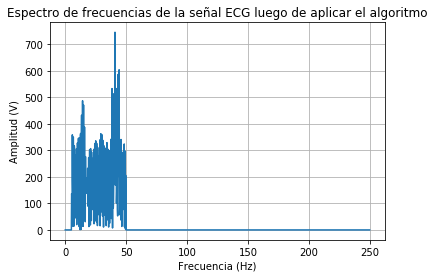

In [11]:
mat_contents = sio.loadmat('senecg.mat')                                      
                                                                                # Inicialmente se carga la señal en formato matlab
print("Las claves cargadas fueron: " + str(mat_contents.keys()))                # y se muestra el formato en el cual estan registrados
senal_ECG = np.squeeze(mat_contents['ECG'])                                     # los datos

fs = 250
tiempo_ECG = np.arange( 0, len(senal_ECG)/fs, 1/fs);    # Vector de tiempo generado

fig8 = plt.figure();    # Gráfica de la señal cargada
plt.plot(tiempo_ECG,senal_ECG)
plt.title('Señal ECG cargada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud(V)')
plt.grid();

fig9 = plt.figure();    # Gráfica de un ciclo tomado del centro para garantizar la totalidad de la señal 
plt.plot(tiempo_ECG[(tiempo_ECG > 1.7) & (tiempo_ECG < 2.6)],   # y considerando que teóricamente tiene duracion de 0.9s
                    senal_ECG[(tiempo_ECG > 1.7) & (tiempo_ECG < 2.6)])
plt.title('1 Ciclo Señal ECG cargada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud(V)')
plt.grid();

# Espectro para la señal cargada
SENAL_ECG = np.abs(np.fft.fft(senal_ECG))

N = SENAL_ECG.shape[0]
F = np.arange(0,N)*fs/N

fig10 = plt.figure();    # Gráfica
plt.plot(F,SENAL_ECG)
plt.title('Espectro de frecuencias de la señal ECG cargada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (V)')
plt.grid();

# Algoritmo de filtrado
F1 = np.fft.fft(SENAL_ECG);
F2 = np.zeros((len(F1)));

# Eliminamos la frecuencia de 0Hz si esta presente que corresponde a un nivel DC
# y se toman frecuencias menores a 50Hz para evitar el ruido generado por la red
# eléctrica de 60Hz, y además se considera únicamente el espectro < 2fs para no
# tomar ningun alias del espectro original

F2[(F > 5) & (F < 50)] = F1[(F > 5) & (F < 50)]
#F2[(F > 200) & (F < 250)] = F1[(F > 200) & (F < 250)] 

# Luego se reconstruye la señal con la transformada inversa
ECG_reconstruido = np.fft.ifft(F2)  

fig11 = plt.figure()    # Se grafica la señal reconstruida
plt.plot(tiempo_ECG,np.real(ECG_reconstruido))
plt.title('Señal luego de aplicar el algoritmo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid();

# Transformada de Fourier de dicha señal
ECG_FILTRADO = np.abs(np.fft.fft(ECG_reconstruido))

N = ECG_FILTRADO.shape[0]
F = np.arange(0,N)*fs/N

fig12 = plt.figure()    # Finalmente se grafica el espectro de la señal reconstruida
plt.plot(F,ECG_FILTRADO)
plt.title('Espectro de frecuencias de la señal ECG luego de aplicar el algoritmo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (V)')
plt.grid();
plt.show()

### Análisis: 
Este método de filtrado parecería ser ideal, dado que elimina por completo las frecuencias
que no son de interés. Sin embargo, la señal reconstruida a partir de la transformada inversa 
no es fiel a la original. Es por esta razón, que la señal obtenida no posee la 
forma habitual de un ECG a pesar de contener sus componentes frecuenciales típicas.

## Conclusiones:

- Con la ejecución y desarrollo de cada uno de los item de este laboratorio se logró realizar un acercamiento con los conceptos fundamentales para el análisis frecuencial de señales, y su aplicación en el análisis de bioseñales.

- Gracias a el tratamiento realizado a la señal ECG del literal 4.5 quedó clara la importancia de la teoria al rededor de las señales fisiológicas, tal como el estudio del espectro de frecuencias que componen la señal fisiológica. Pues, teniendo claro todo lo antes mencionado se facilita determinar la diferenciación de las componentes de ruido y las propias de la señal. Mejorando así el proceso de filtrado. 

- En la aplicación del filtro aplicado en esta práctica, partiendo del espectro de frecuencias de la señal para la posterioor eliminación de componentes no deseadas se encontró que no es un proceso eficiente para el tratamiento de señales fisiológicas ya que la reconstrucción de la señal con base al espectro no es eficiente, pues la señal original se ve afectada por el efecto inducido de este tipo de filtro y la señal reconstruida no tiene la forma habitual de una señal ECG. 